In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s4e11/sample_submission.csv
/kaggle/input/playground-series-s4e11/train.csv
/kaggle/input/playground-series-s4e11/test.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/playground-series-s4e11/train.csv")
test_data = pd.read_csv("/kaggle/input/playground-series-s4e11/test.csv")

In [3]:
train_data.shape

(140700, 20)

In [4]:
test_data.shape

(93800, 19)

In [5]:
train_data.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Profession                             69168 non-null  object 
 7   Academic Pressure                      18767 non-null  float64
 8   Work Pressure                          75022 non-null  float64
 9   CGPA                                   18766 non-null  float64
 10  Study Satisfaction                     18767 non-null  float64
 11  Jo

In [8]:
#check null values
train_data.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [9]:
test_data.isnull().sum()

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               24632
Academic Pressure                        75033
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                       75033
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [10]:
train_data.duplicated().sum()

0

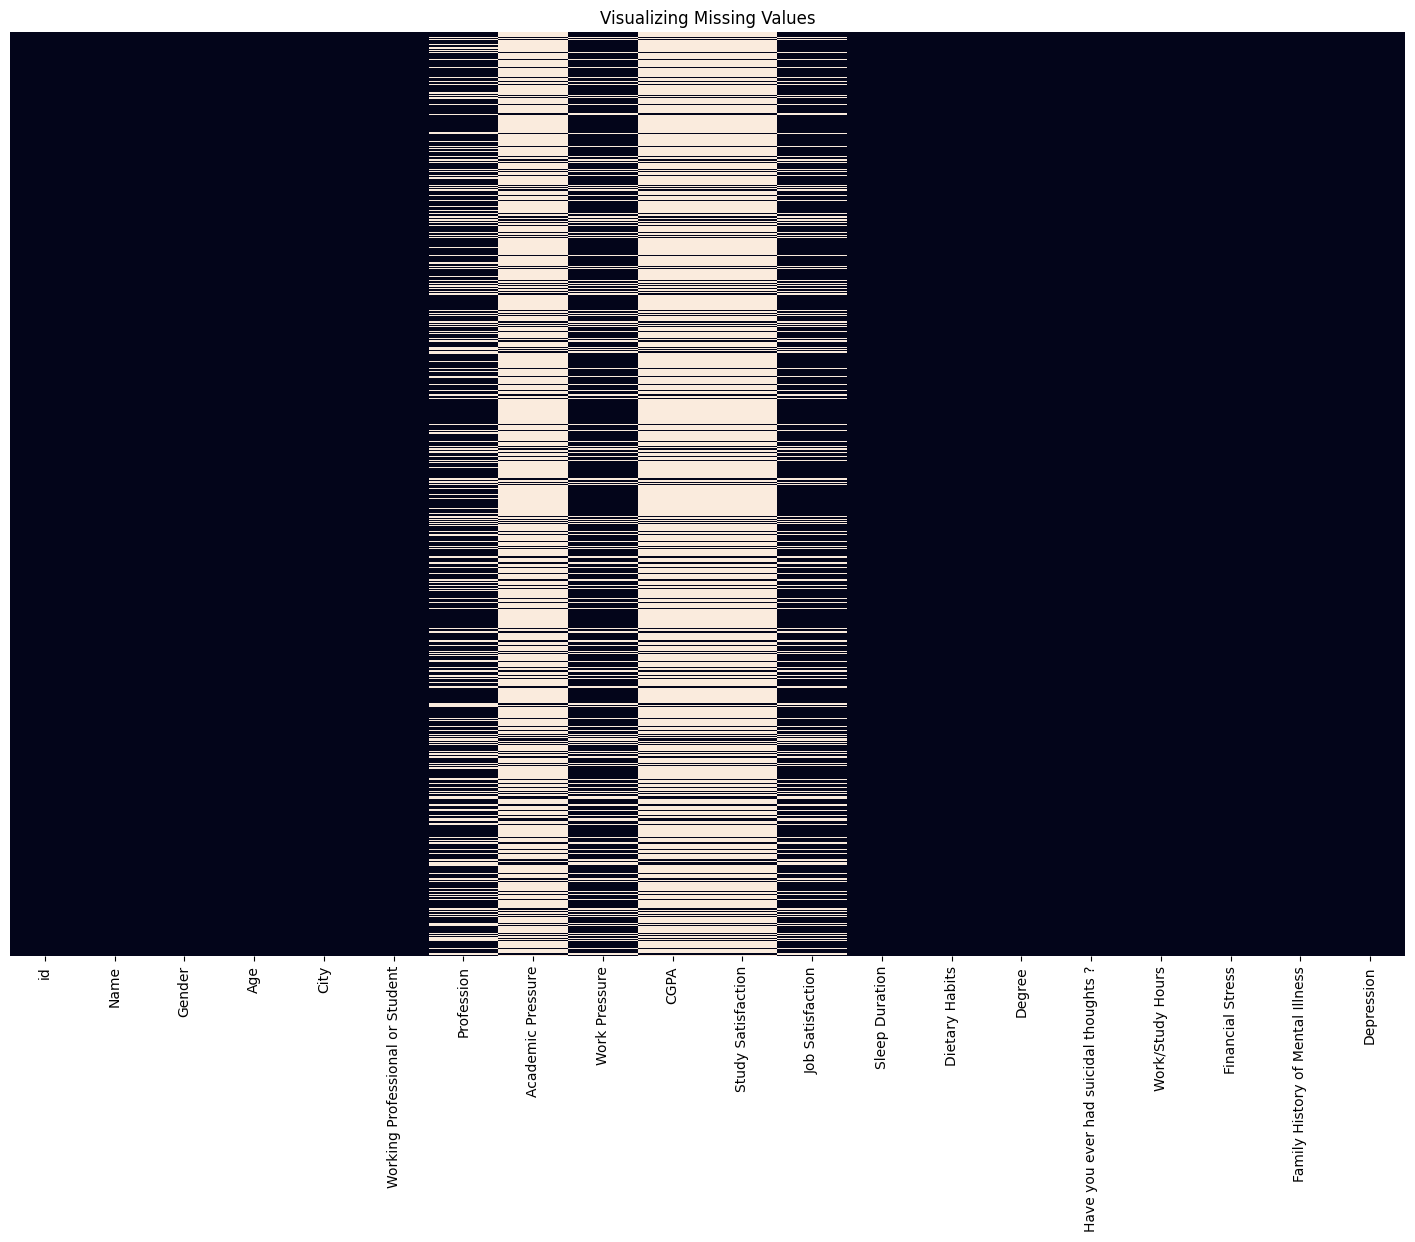

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18,12))
plt.title("Visualizing Missing Values")
sns.heatmap(train_data.isnull(), cbar=False, yticklabels=False);

In [12]:
# Drop 'id' column in both datasets
train_data = train_data.drop(['id'], axis=1)
test_data = test_data.drop(['id'], axis=1)

In [13]:
categorical_columns = train_data.select_dtypes(include=['object']).columns
numerical_columns = train_data.select_dtypes(exclude=['object']).columns.drop('Depression')

In [14]:
categorical_columns, numerical_columns

(Index(['Name', 'Gender', 'City', 'Working Professional or Student',
        'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree',
        'Have you ever had suicidal thoughts ?',
        'Family History of Mental Illness'],
       dtype='object'),
 Index(['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
        'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
        'Financial Stress'],
       dtype='object'))

In [15]:
# Handle null values in numerical columns
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

# Apply imputation to relevant columns, which are numerical and have null values
columns_to_impute = ['Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Financial Stress']
train_data[columns_to_impute] = imputer.fit_transform(train_data[columns_to_impute])

In [16]:
test_copy = test_data.copy() 
test_copy[columns_to_impute] = imputer.fit_transform(test_copy[columns_to_impute])

In [17]:
train_data.isnull().sum()

Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               36630
Academic Pressure                            0
Work Pressure                                0
CGPA                                         0
Study Satisfaction                           0
Job Satisfaction                             0
Sleep Duration                               0
Dietary Habits                               4
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
Depression                                   0
dtype: int64

In [18]:
# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    label_encoders[col] = le

In [19]:
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    test_copy[col] = le.fit_transform(test_copy[col])
    label_encoders[col] = le

In [20]:
train_data.isnull().sum()

Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [21]:
# Prepare features and target variable
X = train_data.drop(columns=['Depression'])
y = train_data['Depression']

In [22]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Train the Random Forest model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(
    n_estimators=10,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=10,
                      random_state=42)

In [24]:
selected_features = ['Age', 'Financial Stress', 'Academic Pressure', 'Working Professional or Student', 'Work Pressure', 'Have you ever had suicidal thoughts ?', 'Job Satisfaction', 'Work/Study Hours', 'Dietary Habits', 'Sleep Duration']

In [25]:
X_selected = X[selected_features]

In [26]:
# Assuming 'y' is your target variable (Depression)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
# Train the Random Forest model
from sklearn.ensemble import RandomForestRegressor
my_model = RandomForestRegressor(
    n_estimators=10,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)
my_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=10,
                      random_state=42)

In [28]:
from sklearn.metrics import mean_absolute_error

#calculate mean absolute error
predictions = my_model.predict(X_test)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error: 0.09813308021974619


In [29]:
test_copy = test_copy[selected_features]

In [30]:
sample_submission = pd.read_csv("/kaggle/input/playground-series-s4e11/sample_submission.csv")
sample_submission["Depression"] =  my_model.predict(test_copy)
sample_submission["Depression"] = (sample_submission["Depression"] >= 0.5).astype(int)
sample_submission.to_csv("submission.csv",index=False)
sample_submission

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0
...,...,...
93795,234495,0
93796,234496,1
93797,234497,0
93798,234498,1
